In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-10000-streamed-songs/Spotify_final_dataset.csv


# Importing Libraries for Vizualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data

In [4]:
df=pd.read_csv('/kaggle/input/spotify-top-10000-streamed-songs/Spotify_final_dataset.csv')
df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [5]:
#Getting Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


In [6]:
#Checking Null Values

df.isna().sum()

Position                  0
Artist Name               0
Song Name                 4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

In [7]:
#Getting percentage of null values

df.isna().sum()/len(df)*100

Position                  0.000000
Artist Name               0.000000
Song Name                 0.036088
Days                      0.000000
Top 10 (xTimes)           0.000000
Peak Position             0.000000
Peak Position (xTimes)    0.000000
Peak Streams              0.000000
Total Streams             0.000000
dtype: float64

In [8]:
#Getting shape of dataset

df.shape

(11084, 9)

In [9]:
#Changing the peak_position_xtimes coulmns into numeric

df['Peak Position (xTimes)']=df['Peak Position (xTimes)'].str.replace('[^0-9\.]','',regex=True)
df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961


In [10]:
df['Artist Name']=df['Artist Name'].str.replace('[$\.]','',regex=True)
df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961


In [11]:
#Changing the coulmn to numeric
df['Peak Position (xTimes)']=df['Peak Position (xTimes)'].astype('int64')

In [12]:
#Checking the Dataypes again

df.dtypes

Position                    int64
Artist Name                object
Song Name                  object
Days                        int64
Top 10 (xTimes)           float64
Peak Position               int64
Peak Position (xTimes)      int64
Peak Streams                int64
Total Streams               int64
dtype: object

In [13]:
#As null values are in very low percentage then we can drop these values

df.dropna(inplace=True)

# Outlier Analysis

In [14]:
#Checking for outliers

df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

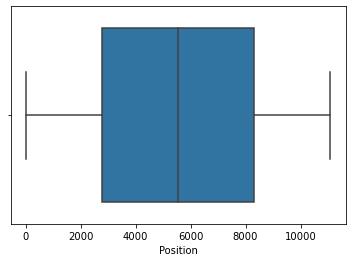

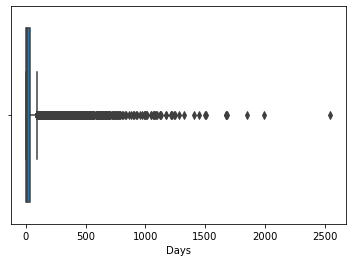

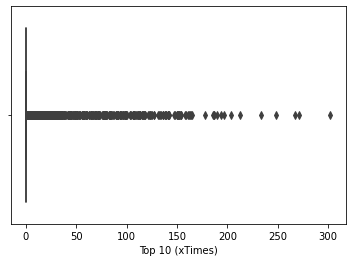

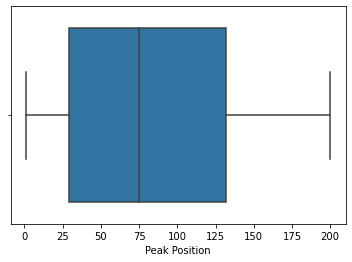

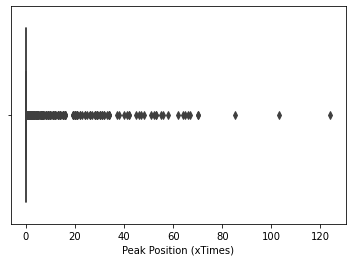

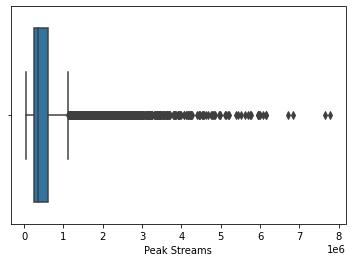

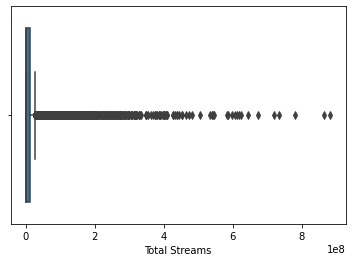

In [15]:
#Getting the numerical cols

col=['Position', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams']

for c in col:
    plt.figure()
    sns.boxplot(df[c])

In [16]:
#As these Coulmns are not outliers because there may be some songs are which maybe superhit and cannot be treated as outliers

## Gathering Insights and Vizualization

In [17]:
#Top 10 songs on the total streams
df.sort_values(by=['Total Streams'],ascending=False).head(10)

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961
5,6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704
6,7,The Weeknd,Blinding Lights,1100,233.0,1,11,2355059,644287953
7,8,XXXTENTACION,Jocelyn Flores,1673,44.0,2,1,3175206,624457164
8,9,XXXTENTACION,SAD!,1217,133.0,1,6,4437612,619879245
9,10,Juice WRLD,All Girls Are The Same,1681,2.0,5,0,1239152,613872384


In [18]:
#Top 10 songs based on days
df.sort_values(by=['Days'], ascending=False).head(10)

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
3,4,J Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
5,6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
9,10,Juice WRLD,All Girls Are The Same,1681,2.0,5,0,1239152,613872384
7,8,XXXTENTACION,Jocelyn Flores,1673,44.0,2,1,3175206,624457164
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
26,27,Joji,SLOW DANCING IN THE DARK,1496,0.0,26,0,661274,437333177
13,14,Lil Baby,Drip Too Hard (Lil Baby & Gunna),1453,122.0,1,6,1759294,583443174
20,21,XXXTENTACION,Fuck Love,1406,9.0,5,0,2438715,473417295


<AxesSubplot:>

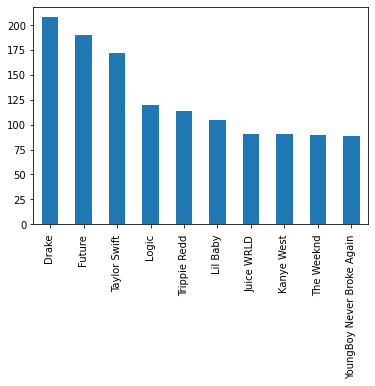

In [19]:
df['Artist Name'].value_counts().head(10).plot(kind="bar")

<AxesSubplot:xlabel='Artist Name'>

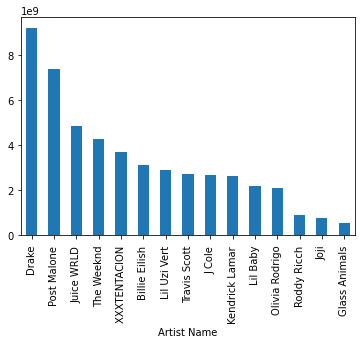

In [20]:
df.groupby(['Artist Name'], sort=False)['Total Streams'].sum().head(15).sort_values(ascending=False).plot(kind="bar")

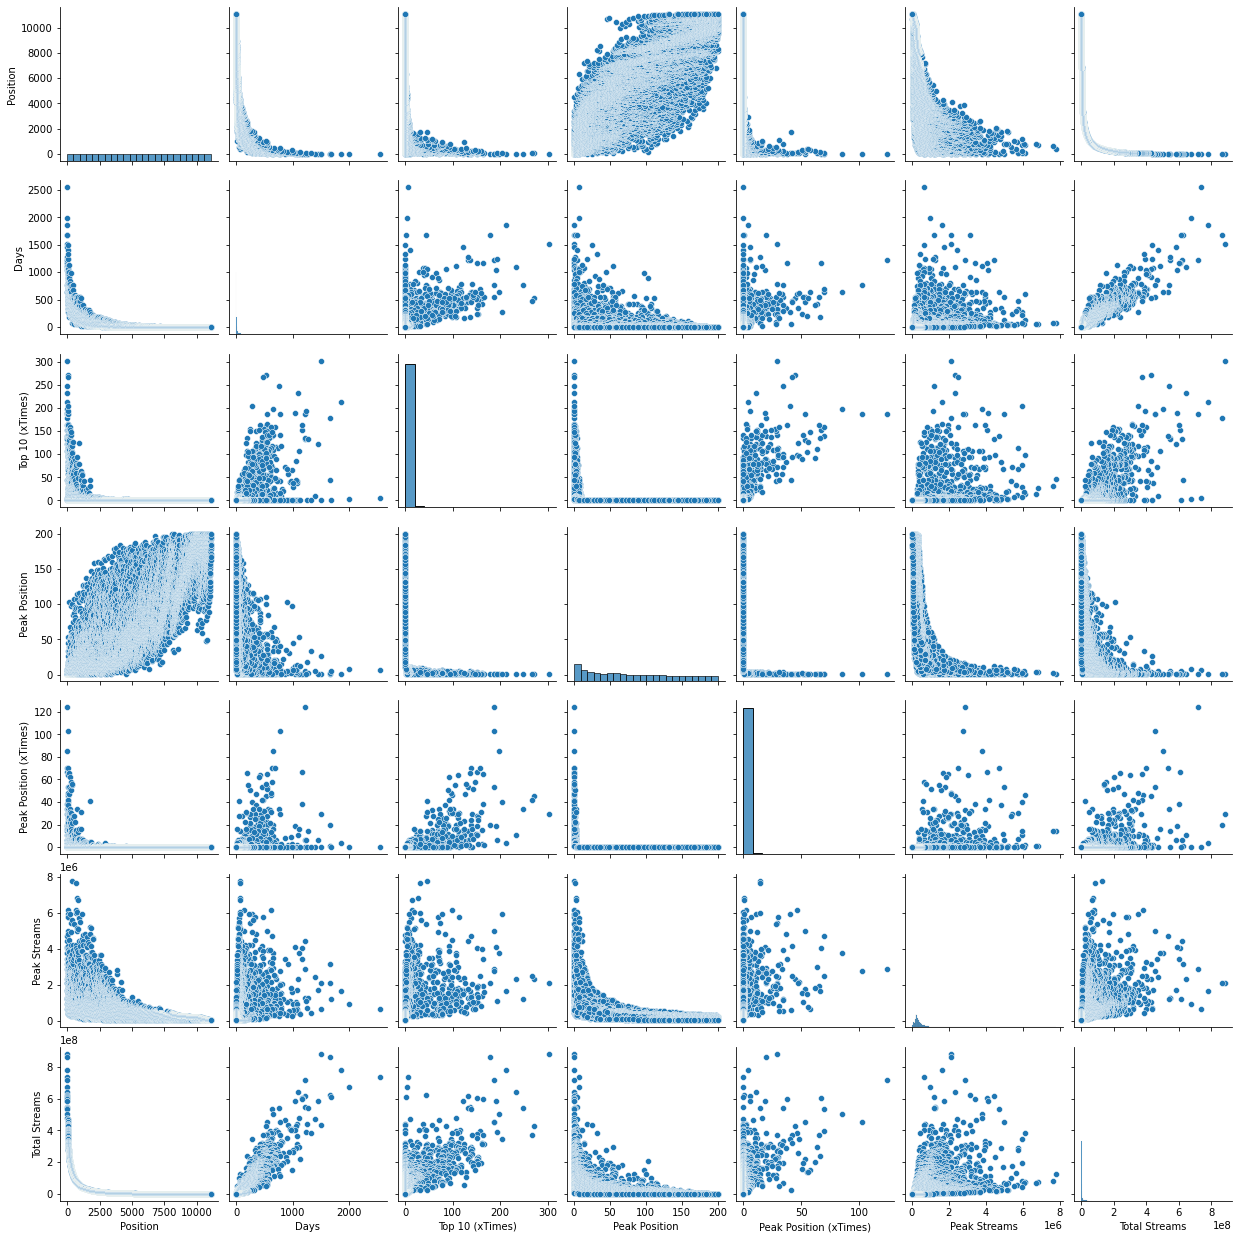

In [21]:
sns.pairplot(df)

<AxesSubplot:>

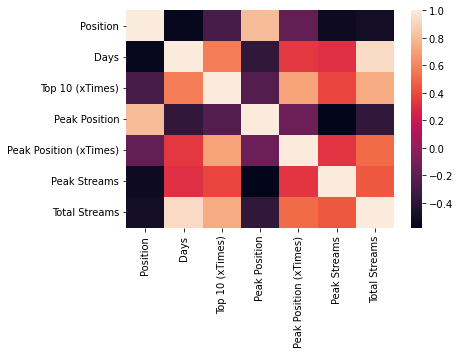

In [22]:
sns.heatmap(df.corr())

In [23]:
#Getting top Streamed songs

df.sort_values(by=['Total Streams'], ascending=False).head(10)

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961
5,6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704
6,7,The Weeknd,Blinding Lights,1100,233.0,1,11,2355059,644287953
7,8,XXXTENTACION,Jocelyn Flores,1673,44.0,2,1,3175206,624457164
8,9,XXXTENTACION,SAD!,1217,133.0,1,6,4437612,619879245
9,10,Juice WRLD,All Girls Are The Same,1681,2.0,5,0,1239152,613872384


In [24]:
#Top 10 Songs
df[['Song Name','Total Streams']].sort_values(by=['Total Streams'], ascending=False).head(10)

,Song Name,Total Streams
0,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,Lucid Dreams,864832399
2,XO TOUR Llif3,781153024
3,No Role Modelz,734857487
4,rockstar,718865961
5,goosebumps,672972704
6,Blinding Lights,644287953
7,Jocelyn Flores,624457164
8,SAD!,619879245
9,All Girls Are The Same,613872384


# Importing Pandasql for Further Insights

In [25]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [26]:
# Reading the data
query = "SELECT * FROM df"
df_orders = sqldf(query)
df_orders.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,4,1660502,781153024
3,4,J Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,124,2905678,718865961


<AxesSubplot:xlabel='Artist Name', ylabel='sum_total'>

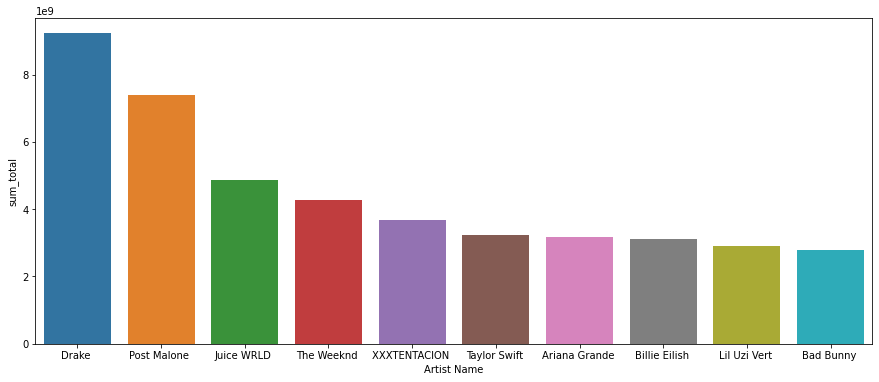

In [27]:
# Getting top 10 Artists

query="select [Artist Name],sum([Total Streams]) as sum_total from df group by [Artist Name] order by sum_total desc Limit 10"
df_sql=sqldf(query)
df_sql
plt.figure(figsize=(15,6))
sns.barplot(x=df_sql['Artist Name'],y=df_sql['sum_total'])

<AxesSubplot:xlabel='Artist', ylabel='Top_c'>

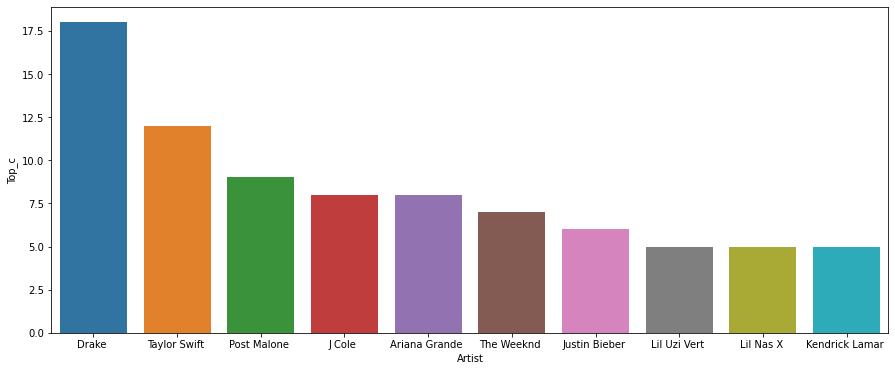

In [28]:
#Artists who Acquired Most Number of times first position
query="select Artist,count(T) as Top_c from(Select [Artist Name] as Artist, [Peak Position] as T from df where [Peak Position]=1) as d group by Artist order by Top_c desc Limit 10"
df_sql=sqldf(query)
df_sql
plt.figure(figsize=(15,6))
sns.barplot(x=df_sql['Artist'],y=df_sql['Top_c'])

<AxesSubplot:xlabel='Artist', ylabel='sum_top'>

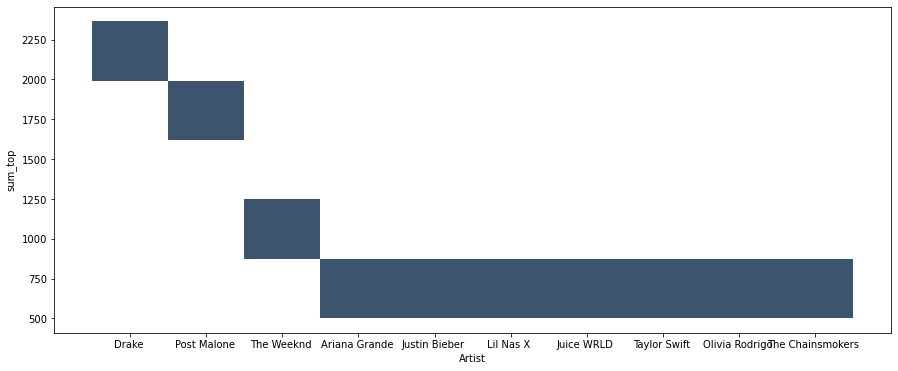

In [31]:
#Artist who came most number of time in Top 10

query='''Select [Artist Name] as Artist,sum([Top 10 (xTimes)]) as sum_top from df group by
[Artist Name] order by sum_top desc Limit 10;'''
df_sql=sqldf(query)
plt.figure(figsize=(15,6))
sns.(x=df_sql['Artist'],y=df_sql['sum_top'])

<AxesSubplot:xlabel='Song', ylabel='Days'>

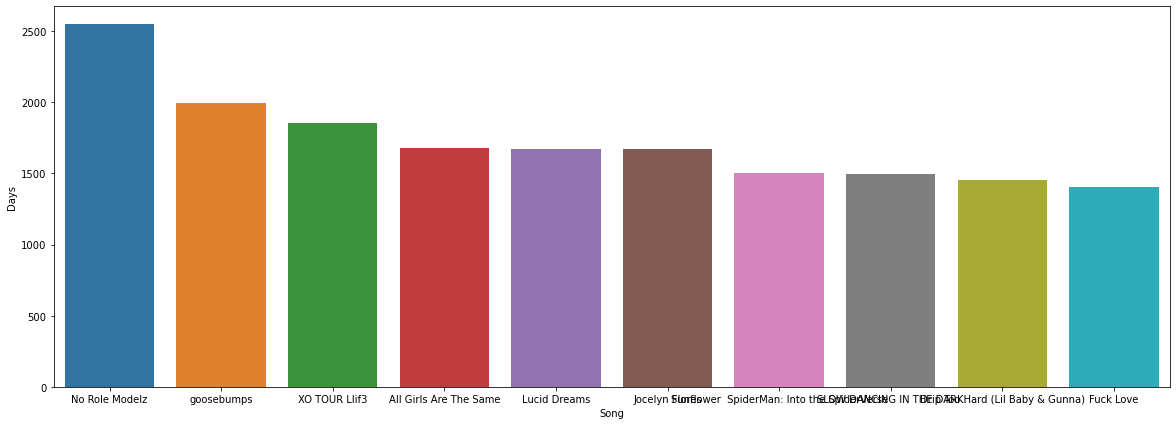

In [44]:
#Songs with most number of days streamed

query='''select song,Days from(select [Song Name] as Song,Days,dense_rank() 
over(order by days desc) as rank1 from df) as d where rank1<10 order by days desc'''
df_sql=sqldf(query)
df_sql
plt.figure(figsize=(20,7))
sns.barplot(x=df_sql['Song'],y=df_sql['Days'])

In [47]:
#Exporting this data
df.to_csv('Spotify.csv')